### sklearn.cluster.KMeans

*_class_ sklearn.cluster.KMeans(_n_clusters=8_, _*_, _init='k-means++'_, _n_init='warn'_, _max_iter=300_, _tol=0.0001_, _verbose=0_, _random_state=None_, _copy_x=True_, _algorithm='lloyd'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/cluster/_kmeans.py#L1161)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans "Permalink to this definition")


Parameters:

**n_clusters**int, default=8

The number of clusters to form as well as the number of centroids to generate.

**init**{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

Method for initialization:

‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

‘random’: choose  `n_clusters`  observations (rows) at random from data for the initial centroids.

If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

**n_init**‘auto’ or int, default=10

Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of  `n_init`  consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see  [Clustering sparse data with k-means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#kmeans-sparse-high-dim)).

When  `n_init='auto'`, the number of runs will be 10 if using  `init='random'`, and 1 if using  `init='kmeans++'`.

New in version 1.2: Added ‘auto’ option for  `n_init`.

Changed in version 1.4: Default value for  `n_init`  will change from 10 to  `'auto'`  in version 1.4.

**max_iter**int, default=300

Maximum number of iterations of the k-means algorithm for a single run.

**tol**float, default=1e-4

Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

**verbose**int, default=0

Verbosity mode.

**random_state**int, RandomState instance or None, default=None

Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**copy_x**bool, default=True

When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

**algorithm**{“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”

K-means algorithm to use. The classical EM-style algorithm is  `"lloyd"`. The  `"elkan"`  variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape  `(n_samples,  n_clusters)`.

`"auto"`  and  `"full"`  are deprecated and they will be removed in Scikit-Learn 1.3. They are both aliases for  `"lloyd"`.

Changed in version 0.18: Added Elkan algorithm

Changed in version 1.1: Renamed “full” to “lloyd”, and deprecated “auto” and “full”. Changed “auto” to use “lloyd” instead of “elkan”.

Attributes:

**cluster_centers_**ndarray of shape (n_clusters, n_features)

Coordinates of cluster centers. If the algorithm stops before fully converging (see  `tol`  and  `max_iter`), these will not be consistent with  `labels_`.

**labels_**ndarray of shape (n_samples,)

Labels of each point

**inertia_**float

Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

**n_iter_**int

Number of iterations run.

**n_features_in_**int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).

New in version 0.24.

**feature_names_in_**ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=["s_len", "s_width", "p_len", "p_width"])

iris_df.head()


,s_len,s_width,p_len,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmean = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmean.fit(iris_df)

C:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmean.labels_)

iris_df["cluster"] = kmean.labels_


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
iris_df["target"] = iris.target

iris_result = iris_df.groupby(["target", "cluster"])["s_len"].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: s_len, dtype: int64


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

iris_pca = pca.fit_transform(iris.data)

iris_df["pca_x"] = iris_pca[:,0]
iris_df["pca_y"] = iris_pca[:,1]
iris_df

,s_len,s_width,p_len,p_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


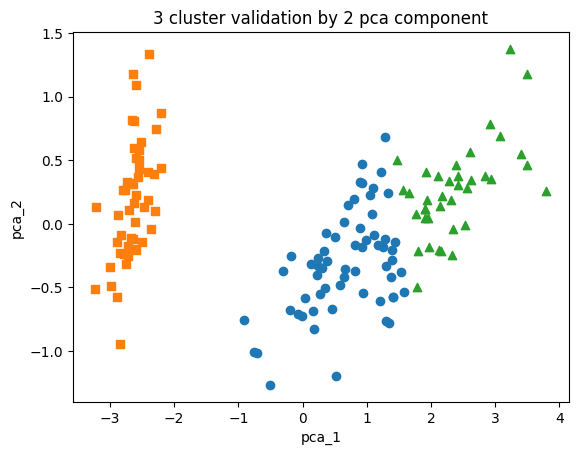

In [13]:
marker0_ind = iris_df[iris_df["cluster"]==0].index
marker1_ind = iris_df[iris_df["cluster"]==1].index
marker2_ind = iris_df[iris_df["cluster"]==2].index

plt.scatter(x=iris_df.loc[marker0_ind, "pca_x"], y=iris_df.loc[marker0_ind, "pca_y"],marker="o")
plt.scatter(x=iris_df.loc[marker1_ind, "pca_x"], y=iris_df.loc[marker1_ind, "pca_y"],marker="s")
plt.scatter(x=iris_df.loc[marker2_ind, "pca_x"], y=iris_df.loc[marker2_ind, "pca_y"],marker="^")

plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.title("3 cluster validation by 2 pca component")
plt.show()